<a href="https://colab.research.google.com/github/Kane0068/testrepo/blob/main/Using_Views.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Using Views

# Yeni Bölüm

**JOBS TABLE EXAMPLE**

<table ><tr><th >JOB_IDENT<th><th> JOB_TITLE <th><th> MIN_SALARY<th><th> MAX_SALARY<tr><tr>
<tr><td> 100 <td><td> Sr.Architect<td><td> 60000<td><td> 100000<td><tr><table>

**EMPLOYEES TABLE EXAMPLE**

<table ><tr><th >EMP_ID<th><th> F_NAME <th><th> L_NAME<th><th> SSN<th><th> B_DATE<th><th> SEX<th><th> ADDRESS<th><th> JOB_ID<th><th> SALARY<th><th> MANAGER_ID<th><th> DEP_ID<tr><tr>
<tr><td> E1001 <td><td> John<td><td> Thomas<td><td> 123456<td><td> 1976-01-09<td><td> M<td><td> 5631 Rice,OakPark,JL<td><td> 100<td><td> 100000<td><td> 30001 <td><td>2<td><tr><table>




##1- CREATE VİEW




```
CREATE VIEW EMPSALARY AS SELECT EMP_ID,F_NAME,L_NAME,B_DATE,SEX,SALARY FROM EMPLOYEES;
```



In [ ]:
# GÖSTERMEK İÇİN
SELECT * FROM EMPSALARY;

##2- UPDATE VIEW

In [ ]:
CREATE OR REPLACE VIEW EMPSALARY SELECT EMP_ID,F_NAME_L_NAME,B_DATE,SEX,JOB_TITLE,MIN_SALARY,MAX_SALARY
FROM EMPLOYEES E,JOBS J
WHERE E.JOB_ID = J.JOB_IDENT;

## DROP VIEW

In [ ]:
DROP VIEW EMPSALARY;

# Stored Procedures
* saklı yordamlar

1. Egzersiz
> * Bu alıştırmada, SQL kullanarak Db2'deki bir tablodan veri okumak için bir saklı yordam oluşturacak ve yürüteceksiniz.

> * BÜTÜN VERİLERİ ÇAĞIRABİLECEĞİMİZ TEK BİR FONKSİYON YAZALIM

In [ ]:
--#SET TERMINATOR @
CREATE PROCEDURE RETRIEVE_ALL       -- Name of this stored procedure routine

LANGUAGE SQL                        -- Language used in this routine 
READS SQL DATA                      -- This routine will only read data from the table

DYNAMIC RESULT SETS 1               -- Maximum possible number of result-sets to be returned to the caller query

BEGIN 

    DECLARE C1 CURSOR               -- CURSOR C1 will handle the result-set by retrieving records row by row from the table
    WITH RETURN FOR                 -- This routine will return retrieved records as a result-set to the caller query
    
    SELECT * FROM PETSALE;          -- Query to retrieve all the records from the table
    
    OPEN C1;                        -- Keeping the CURSOR C1 open so that result-set can be returned to the caller query

END
@    

In [ ]:
# ÇAĞIRMAK İÇİN

CALL RETRIEVE_ALL

In [ ]:
# SİLMEK İÇİN;
DROP PROCEDURE RETRIEVE_ALL

## Alıştırma 2
Bu alıştırmada, SQL kullanarak Db2'deki bir tablodaki verileri yazmak/değiştirmek için bir saklı yordam oluşturacak ve yürüteceksiniz.

* Animal_ID ve Animal_Health parametreleriyle UPDATE_SALEPRICE adlı bir saklı yordam yordamı oluşturacaksınız .
* Bu UPDATE_SALEPRICE rutini, PETSALE tablosundaki hayvanların sağlık koşullarına, KÖTÜ veya KÖTÜ'ye bağlı olarak satış fiyatını güncellemek için SQL sorguları içerecektir .
* Bu prosedür rutini, hayvanın sağlık durumuna bağlı olarak PETSALE tablosundaki satış fiyatını güncellemek için kullanılacak parametreler olarak hayvan kimliğini ve sağlık durumunu alacaktır. Sanmak -
* Sağlık durumu KÖTÜ olan ID XX'li hayvan için satış fiyatı %25 oranında daha da düşürülecektir.
* Sağlık durumu KÖTÜ olan YY ID'li hayvan için satış fiyatı %50 oranında daha da düşürülecektir.
* ZZ ID'ye sahip başka bir sağlık durumu olan hayvan için satış fiyatı değişmeyecektir.

In [ ]:
--#SET TERMINATOR @
CREATE PROCEDURE UPDATE_SALEPRICE ( 
    IN Animal_ID INTEGER, IN Animal_Health VARCHAR(5) )     -- ( { IN/OUT type } { parameter-name } { data-type }, ... )

LANGUAGE SQL                                                -- Language used in this routine
MODIFIES SQL DATA                                           -- This routine will only write/modify data in the table

BEGIN 

    IF Animal_Health = 'BAD' THEN                           -- Start of conditional statement
        UPDATE PETSALE
        SET SALEPRICE = SALEPRICE - (SALEPRICE * 0.25)
        WHERE ID = Animal_ID;
    
    ELSEIF Animal_Health = 'WORSE' THEN
        UPDATE PETSALE
        SET SALEPRICE = SALEPRICE - (SALEPRICE * 0.5)
        WHERE ID = Animal_ID;
        
    ELSE
        UPDATE PETSALE
        SET SALEPRICE = SALEPRICE
        WHERE ID = Animal_ID;

    END IF;                                                 -- End of conditional statement
    
END
@   

In [ ]:
# CALL PRECEDURE

CALL RETRIEVE_ALL;  # öNCEKİ HALİ
CALL UPDATE_SALEPRICE(1,'BAD');  # GÜNCELLEME İŞLEMİ YAPALIM
CALL RETRIEVE_ALL ;  # TEKRAR BAKALIM

In [ ]:
 # AGAIN

 CALL RETRIEVE_ALL;

CALL UPDATE_SALEPRICE(3, 'WORSE');      -- Caller query

CALL RETRIEVE_ALL;

# Committing and Rolling back a Transaction using a Stored Procedure
* A transaction is simply a sequence of operations performed using one or more SQL statements as a single logical unit of work. A database transaction must be ACID (Atomic, Consistent, Isolated and Durable). The effects of all the SQL statements in a transaction can either be applied to the database using the COMMIT command or undone from the database using the ROLLBACK command.

* In this lab, you will learn some commonly used TCL (Transaction Control Language) commands of SQL through the creation of a stored procedure routine. You will learn about COMMIT, which is used to permanently save the changes done in the transactions in a table, and about ROLLBACK, which is used to undo the transactions that have not been saved in a table. ROLLBACK can only be used to undo the changes in the current unit of work.



* You will create a stored procedure routine named TRANSACTION_ROSE which will include TCL commands like COMMIT and ROLLBACK.
* Now develop the routine based on the given scenario to execute a transaction.
* Scenario: Let’s buy Rose a pair of Boots from ShoeShop. So we have to update the Rose balance as well as the ShoeShop balance in the BankAccounts table. Then we also have to update Boots stock in the ShoeShop table. After Boots, let’s also attempt to buy Rose a pair of Trainers.
To create the stored procedure routine on Db2, copy the code below and paste it to the textbox of the Run SQL page. Click Run all.

**ÜRÜNÜ VE PARAYI GÜNCELLEME İŞLEMLERİ YAPIYORUZ**

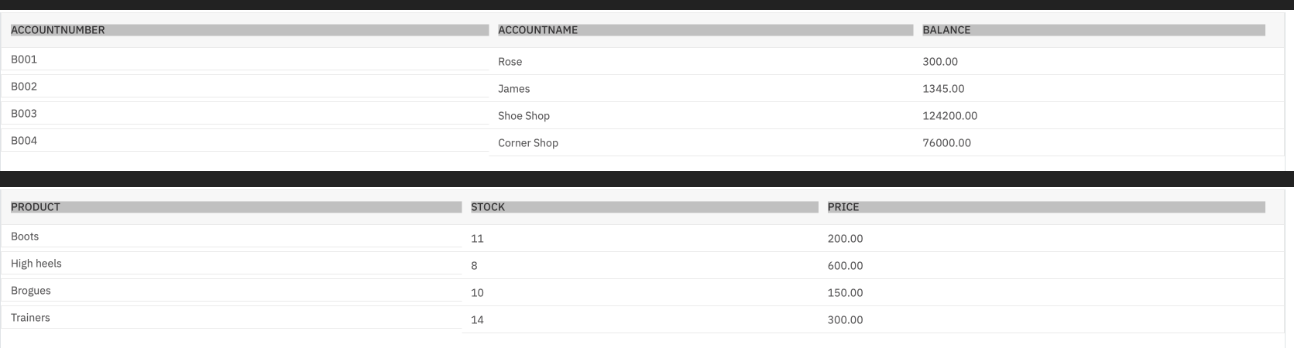

In [ ]:
--#SET TERMINATOR @
CREATE PROCEDURE TRANSACTION_ROSE                           -- Name of this stored procedure routine
LANGUAGE SQL                                                -- Language used in this routine 
MODIFIES SQL DATA                                           -- This routine will only write/modify data in the table
BEGIN
        DECLARE SQLCODE INTEGER DEFAULT 0;                  -- Host variable SQLCODE declared and assigned 0
        DECLARE retcode INTEGER DEFAULT 0;                  -- Local variable retcode with declared and assigned 0
        DECLARE CONTINUE HANDLER FOR SQLEXCEPTION           -- Handler tell the routine what to do when an error or warning occurs
        SET retcode = SQLCODE;                              -- Value of SQLCODE assigned to local variable retcode
        
        UPDATE BankAccounts
        SET Balance = Balance-200
        WHERE AccountName = 'Rose';
        
        UPDATE BankAccounts
        SET Balance = Balance+200
        WHERE AccountName = 'Shoe Shop';
        
        UPDATE ShoeShop
        SET Stock = Stock-1
        WHERE Product = 'Boots';
        
        UPDATE BankAccounts
        SET Balance = Balance-300
        WHERE AccountName = 'Rose';
        
        IF retcode < 0 THEN                                  --  SQLCODE returns negative value for error, zero for success, positive value for warning
            ROLLBACK WORK;
        
        ELSE
            COMMIT WORK;
        
        END IF;
        
END
@                                                            -- Routine termination character

In [ ]:
# ÇAĞIRMA İŞLEMLERİ YAPALIM

CALL TRANSACTION_ROSE;  -- Caller query
SELECT * FROM BankAccounts;
SELECT * FROM ShoeShop;

**İşlemin gerçekleştirildiğini görebiliriz. Ancak tabloları incelediğimizde hiçbir değişiklik COMMIT aracılığıyla kalıcı olarak kaydedilmedi. Bir SQL ifadesinin veya daha fazlasının başarısız olması nedeniyle tüm işlem başarısız olduğundan, meydana gelen tüm olası değişiklikler ROLLBACK aracılığıyla geri alınmış olabilir. İşlemin başarısız olmasının olası nedenini ve COMMIT - ROLLBACK'in bir saklı yordam üzerinde nasıl çalıştığını inceleyelim:

İlk üç UPDATE başarıyla çalışmalıdır. BankAccounts tablosunda hem Rose hem de ShoeShop'un bakiyesi güncellenmiş olmalıdır. Rose'un mevcut bakiyesi 300 - 200 (bir çift Bot fiyatı) = 100 olmalıdır. ShoeShop'un mevcut bakiyesi 124200 + 200 = 124400 olmalıdır. Rose için başarılı satın alma, 11 - 1 = 10.

Son GÜNCELLEME ifadesi Rose'a bir çift Spor Ayakkabı almaya çalışıyor, ancak bir çift Çizme satın aldıktan sonra bakiyesi yetersiz kalıyor (Rose'un mevcut bakiyesi: 100 < Spor Ayakkabı Fiyatı: 300). Bu nedenle, son UPDATE ifadesi başarısız olur. SQL deyimlerinden herhangi birinin başarısız olması durumunda tüm işlem başarısız olacağından, işlem gerçekleştirilmeyecektir.

Tek başına bir ana bilgisayar değişkeni olan SQLCODE , her SQL deyiminin yürütülmesine ilişkin başarı/başarısızlık/uyarı bilgilerini içerir. SQLCODE değişkeni sonraki SQL deyimi çalışırken sıfırlandığından, retcode bu SQLCODE'un dönüş değerini yakalamak için yerel değişkenimizdir . Başarılı bir şekilde çalıştırılmazsa, SQLCODE her SQL ifadesi için negatif değer döndürür. Bu nedenle, herhangi bir hata oluştuğunda, tüm değişiklikler geri alınır. Taahhüt, yalnızca işlem herhangi bir hata olmadan başarıyla yürütüldükten sonra gerçekleşir.**

## Şimdi bir işlemi gerçekleştirme ve geri alma alıştırması yapalım.

Sorun:
Aşağıdaki senaryoya dayalı olarak bir işlemi yürütmek için TRANSACTION_JAMES saklı bir prosedür oluşturun : Önce ShoeShop'tan James'e 4 çift Spor Ayakkabı satın alın. Hem kendi bakiyesini hem de ShoeShop bakiyesini güncelleyin. Ayrıca, ShoeShop'ta Spor Ayakkabı stokunu güncelleyin. Ardından James'e ShoeShop'tan bir çift Brogue almayı deneyin. UPDATE ifadelerinden herhangi biri başarısız olursa, tüm işlem başarısız olur. İşlemi geri alacaksınız. İşlemi yalnızca tüm işlem başarılı olursa gerçekleştirin.

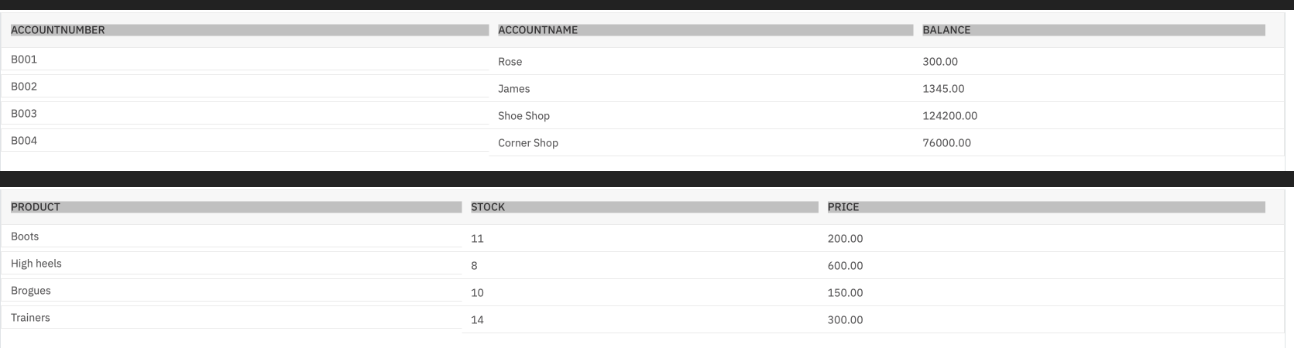

In [ ]:
--#SET TERMINATOR @
CREATE PROCEDURE TRANSACTION_JAMES                           -- Name of this stored procedure routine
LANGUAGE SQL                                                -- Language used in this routine 
MODIFIES SQL DATA                                           -- This routine will only write/modify data in the table
BEGIN
        DECLARE SQLCODE INTEGER DEFAULT 0;                  -- Host variable SQLCODE declared and assigned 0
        DECLARE retcode INTEGER DEFAULT 0;                  -- Local variable retcode with declared and assigned 0
        DECLARE CONTINUE HANDLER FOR SQLEXCEPTION           -- Handler tell the routine what to do when an error or warning occurs
        SET retcode = SQLCODE;                              -- Value of SQLCODE assigned to local variable retcode
        
        UPDATE BankAccounts
        SET Balance = Balance-1200
        WHERE AccountName = 'James';
        
        UPDATE BankAccounts
        SET Balance = Balance+1200
        WHERE AccountName = 'Shoe Shop';
        
        UPDATE ShoeShop
        SET Stock = Stock-4
        WHERE Product = 'Trainers';
        
        UPDATE BankAccounts
        SET Balance = Balance-150
        WHERE AccountName = 'James';
        
        IF retcode < 0 THEN                                  --  SQLCODE returns negative value for error, zero for success, positive value for warning
            ROLLBACK WORK;
        
        ELSE
            COMMIT WORK;
        
        END IF;
        
END
@       

In [ ]:
CALL TRANSACTION_JAMES;  -- Caller query
SELECT * FROM BankAccounts;
SELECT * FROM ShoeShop;

#Joins

In [ ]:
CROSS JOIN (Cartesian Join olarak da bilinir) deyimi sözdizimi nasıl görünür?

SELECT column_name(s)
FROM table1
CROSS JOIN table2;

In [ ]:
INNER JOIN deyimi sözdizimi nasıl görünür?

SELECT column_name(s)
FROM table1
INNER JOIN table2
ON table1.column_name = table2.column_name;
WHERE condition;

In [ ]:
LEFT OUTER JOIN deyimi sözdizimi nasıl görünür?

SELECT column_name(s)
FROM table1
LEFT OUTER JOIN table2
ON table1.column_name = table2.column_name
WHERE condition;

In [ ]:
RIGHT OUTER JOIN deyimi sözdizimi nasıl görünür?

SELECT column_name(s)
FROM table1
RIGHT OUTER JOIN table2
ON table1.column_name = table2.column_name
WHERE condition;

In [ ]:

FULL OUTER JOIN deyimi sözdizimi nasıl görünür?

SELECT column_name(s)
FROM table1
FULL OUTER JOIN table2
ON table1.column_name = table2.column_name
WHERE condition;


In [ ]:
SELF JOIN deyimi sözdizimi nasıl görünür?

SELECT column_name(s)
FROM table1 T1, table1 T2
WHERE condition;

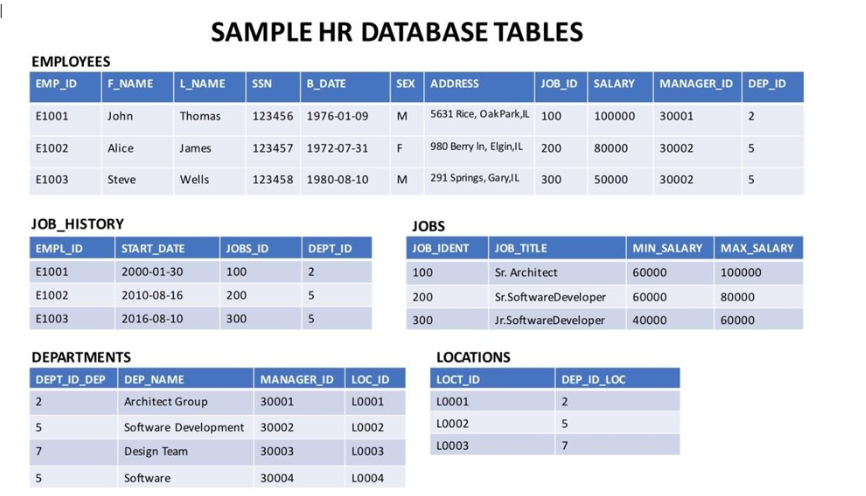

## 1- Problem:

* Select the names and job start dates of all employees who work for the department number 5.


* 5 numaralı departman için çalışan tüm çalışanların isimlerini ve işe başlama tarihlerini seçin.



```
SELECT E.F_NAME,E.L_NAME,JH.START_DATE
FROM EMPLOYEES AS E 
INNER JOIN JOB_HISTORY AS JH ON E.EMP_ID = JH.EMPL_ID
WHERE E.DEP_ID='5';
```



## 2- Problem
* Select the names, job start dates, and job titles of all employees who work for the department number 5.
 * 5 numaralı departman için çalışan tüm çalışanların isimlerini, işe başlama tarihlerini ve iş unvanlarını seçin.



```
SELECT E.F_NAME,E.L_NAME,JH.START_DATE,J.JOB_TITLE
FROM EMPLOYEES AS E
INNER JOIN JOB_HISTORY AS JH ON E.EMP_ID = J.EMPL_ID
INNER JOIN JOBS AS J ON E.JOB_ID = J.JOB_IDENT
WHERE E.DEP_ID = '5';
```




## 3- PROBLEM
* Perform a Left Outer Join on the EMPLOYEES and DEPARTMENT tables and select employee id, last name, department id and department name for all employees.


* ÇALIŞANLAR ve BÖLÜM tablolarında bir Sol Dış Birleştirme gerçekleştirin ve tüm çalışanlar için çalışan kimliği, soyadı, departman kimliği ve departman adını seçin.



In [ ]:
SELECT E.F_NAME,E.L_NAME,D.DEPT_ID_DEP,D.DEP_NAME
FROM EMPLOYEES AS E
LEFT OUTER JOIN DEPARTMENTS AS D ON E.DEP_ID = D.DEPT_ID_DEP;

## 4.PROBLEM 
* Re-write the previous query but limit the result set to include only the rows for employees born before 1980.
* Önceki sorguyu yeniden yazın, ancak sonuç kümesini yalnızca 1980'den önce doğan çalışanlar için satırları içerecek şekilde sınırlayın.



```
SELECT E.F_NAME,E.L_NAME,E.DEP_ID,D.DEP_NAME
FROM EMPLOYEES AS E
LEFT OUTER JOIN DEPARTMENTS AS D ON E.DEP_ID = D.DEPT_ID_DEP
WHERE YEAR(E.B_DATE)< 1980;
```







## 5.PROBLEM

* Önceki sorguyu yeniden yazın, ancak sonuç kümesinin yalnızca 1980'den önce doğmuş çalışanlar için departman adları dışında tüm çalışanları içermesini sağlayın.

* Re-write the previous query but have the result set include all the employees but department names for only the employees who were born before 1980.



```
SELECT E.F_NAME,E.L_NAME,E.DEP_ID,D.DEP_NAME
FROM EMPLOYEES AS E
LEFT OUTER JOIN DEPARTMENTS AS D ON E.DEP_ID = D.DEPT_ID_DEP
AND YEAR(E.B_DATE)<1980;
```





## 6.PROBLEM 
* Perform a Full Join on the EMPLOYEES and DEPARTMENT tables and select the First name, Last name and Department name of all employees.

* ÇALIŞANLAR ve BÖLÜM tablolarında Tam Birleştirme gerçekleştirin ve tüm çalışanların Adını, Soyadını ve Departman adını seçin.



```
SELECT E.F_NAME,E.L_NAME,D.DEP_NAME
FROM EMPLOYEES AS E
FULL OUTER JOIN DEPARTMENTS AS D ON E.DEP_ID = D.DEPT_ID_DEP;

```





## 7 .PROBLEM

* Önceki sorguyu yeniden yazın, ancak sonuç kümesinin tüm çalışan adlarını içermesini sağlayın, ancak departman kimliği ve departman adları yalnızca erkek çalışanlar için.

* Re-write the previous query but have the result set include all employee names but department id and department names only for male employees.



```
SELECT E.F_NAME,E.L_NAME,D.DEP_NAME
FROM EMPLOYEES AS E
FULL OUTER JOIN DEPARTMENTS AS D ON E.DEP_ID = D.DEPT_ID_DEP
WHERE E.SEX = 'M';
```




# EXERCISE

## exercıse-1

* 18 numaralı topluluk alanındaki tüm suçlar için vaka numarasını, suç türünü ve topluluk alanını listeleyin.

* List the case number, type of crime and community area for all crimes in community area number 18.




```
SELECT C.COMMUNITY_AREA_NAME,   
```



In [ ]:
* Bir okulda işlenen tüm suçları listeleyin. Vaka numarasını, suç türünü ve topluluk adını ekleyin.
* List all crimes that took place at a school. Include case number, crime type and community name.


In [ ]:
Oakland, Armor Square, Edgewater ve CHICAGO toplulukları için ilgili topluluk_alanı_numaralarını ve vaka_numberlerini listeleyin.
* For the communities of Oakland, Armour Square, Edgewater and CHICAGO list the associated community_area_numbers and the case_numbers.


# FINAL PROJECT
DATASETS
* CENSUS_DATA
* CHICAGO_CRIME_DATA
* CHICAGO_PUBLIC_SCHOOL

In [ ]:
Question 1
* Write and execute a SQL query to list the school names, community names and average attendance for communities with a hardship index of 98.,
* Zorluk endeksi 98 olan topluluklar için okul adlarını, topluluk adlarını ve ortalama katılımı listelemek için bir SQL sorgusu yazın ve yürütün.
%%sql

SELECT S.SCHOOL_NAMES,S.COMMUNITY_AREA_NAME,S.AVERAGE_STUDENT_ATTENDANCE
FROM CHICAGO_PUBLIC_SCHOOL AS S
LEFT OUTER JOIN CENSUS_DATA AS C
ON S.COMMUNITY_AREA_NUMBER  =  C.COMMUNITY_AREA_NUMBER
WHERE C.HARDSHIP_INDEX = 98;


In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv("ChicagoCensusData.csv")

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 9 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   COMMUNITY_AREA_NUMBER                         77 non-null     float64
 1   COMMUNITY_AREA_NAME                           78 non-null     object 
 2   PERCENT_OF_HOUSING_CROWDED                    78 non-null     float64
 3   PERCENT_HOUSEHOLDS_BELOW_POVERTY              78 non-null     float64
 4   PERCENT_AGED_16__UNEMPLOYED                   78 non-null     float64
 5   PERCENT_AGED_25__WITHOUT_HIGH_SCHOOL_DIPLOMA  78 non-null     float64
 6   PERCENT_AGED_UNDER_18_OR_OVER_64              78 non-null     float64
 7   PER_CAPITA_INCOME                             78 non-null     int64  
 8   HARDSHIP_INDEX                                77 non-null     float64
dtypes: float64(7), int64(1), object(1)
memory usage: 5.6+ KB


In [ ]:
data1 = pd.read_csv("ChicagoCrimeData.csv")
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 533 entries, 0 to 532
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     533 non-null    int64  
 1   CASE_NUMBER            533 non-null    object 
 2   DATE                   533 non-null    object 
 3   BLOCK                  533 non-null    object 
 4   IUCR                   533 non-null    object 
 5   PRIMARY_TYPE           533 non-null    object 
 6   DESCRIPTION            533 non-null    object 
 7   LOCATION_DESCRIPTION   533 non-null    object 
 8   ARREST                 533 non-null    bool   
 9   DOMESTIC               533 non-null    bool   
 10  BEAT                   533 non-null    int64  
 11  DISTRICT               533 non-null    int64  
 12  WARD                   490 non-null    float64
 13  COMMUNITY_AREA_NUMBER  490 non-null    float64
 14  FBICODE                533 non-null    object 
 15  X_COOR

In [ ]:
data2 = pd.read_csv("ChicagoPublicSchools.csv")
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 566 entries, 0 to 565
Data columns (total 78 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   School_ID                                         566 non-null    int64  
 1   NAME_OF_SCHOOL                                    566 non-null    object 
 2   Elementary, Middle, or High School                566 non-null    object 
 3   Street_Address                                    566 non-null    object 
 4   City                                              566 non-null    object 
 5   State                                             566 non-null    object 
 6   ZIP_Code                                          566 non-null    int64  
 7   Phone_Number                                      566 non-null    object 
 8   Link                                              565 non-null    object 
 9   Network_Manager      